In [3]:
# %pip install scikit-learn

In [168]:
import numpy as np
from sklearn import random_projection
X = np.random.rand(10000, 10000)

transformer = random_projection.SparseRandomProjection(eps=0.1, n_components=X.shape[1]//2)
X_new = transformer.fit_transform(X)
X_new.shape


(10000, 5000)

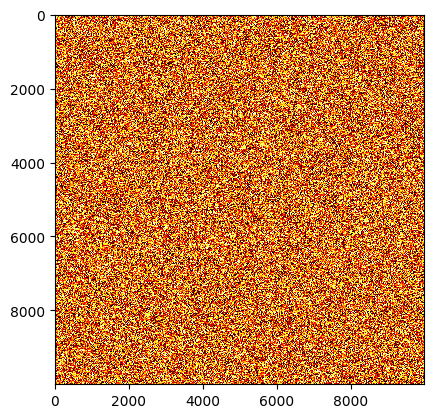

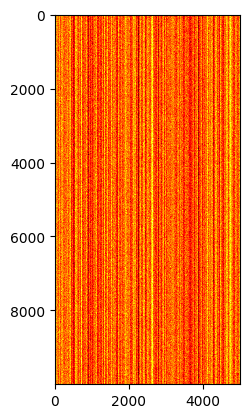

In [169]:
# visualize X
import matplotlib.pyplot as plt
plt.imshow(X, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(X_new, cmap='hot', interpolation='nearest')
plt.show()



In [89]:
def approx_mul(A,B, n_components=1000, eps=0.1):
    transform = random_projection.SparseRandomProjection(n_components=n_components, eps=0.1)
    return transform.fit_transform(A) @ (transform.fit_transform(B.T)).T

def mat_mul(A,B):
    return A @ B


In [115]:
# time approx_mul vs mat_mul


A = np.random.rand(10000, 50) 
B = np.random.rand(50, 3000)  

n_components = A.shape[1]//2  # Reduced dimensionality for demonstration
eps = 0.1

%timeit approx_mul(A,B, n_components=n_components, eps=eps)
%timeit mat_mul(A,B)

307 ms ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
306 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [167]:
A = np.random.rand(100, 50) 
B = np.random.rand(50, 30)   

# Perform actual matrix multiplication for comparison
actual_product = A @ B

# The dimension 'n_components' is much less than the original dimensions
n_components = A.shape[1]//2  # Reduced dimensionality for demonstration
eps = 0.1
error_adjustment = 10.0

approx_product = np.add(approx_mul(A, B, n_components=n_components, eps=eps), error_adjustment)

print("Actual product shape:", actual_product.shape)
print("Approximated product shape:", approx_product.shape)
print("Minimum value in actual product:", actual_product.min())
print("Minimum value in approx product:", approx_product.min())
print("Maximum value in actual product:", actual_product.max())
print("Maximum value in approx product:", approx_product.max())
print("Frobenius norm of the difference:", np.linalg.norm(actual_product - approx_product))
print("Root Mean squared error:", np.sqrt(np.mean((actual_product - approx_product) ** 2)))
print("Relative error:", np.linalg.norm(actual_product - approx_product) / np.linalg.norm(actual_product))
print("Absolute max error:", np.max(np.abs(actual_product - approx_product)))
# print(actual_product)
# print()
# print(approx_product)
print()
print(actual_product - approx_product)


Actual product shape: (100, 30)
Approximated product shape: (100, 30)
Minimum value in actual product: 8.199166141661415
Minimum value in approx product: 3.2238937491805917
Maximum value in actual product: 18.21382014720409
Maximum value in approx product: 21.41746345672319
Frobenius norm of the difference: 159.37563487798042
Root Mean squared error: 2.9097876779792324
Relative error: 0.2308501666212658
Absolute max error: 9.892460003050967

[[-1.46071506  0.18800432  1.3726991  ...  2.73452686  1.82895683
  -0.96688375]
 [-3.57594778 -2.47114234  1.1579019  ...  0.3413707  -1.20190515
  -4.01527375]
 [ 1.59323763  2.38072451  4.09864351 ...  2.4747598   3.32923132
   1.35076528]
 ...
 [ 3.68384243  3.88361084  3.59496447 ...  5.01039318  0.87601101
   2.60288634]
 [ 1.05460966 -1.83341799 -0.10058257 ... -1.19823371 -1.0674709
  -1.2436743 ]
 [-4.27092071 -3.1083608  -2.21542399 ... -2.53522656 -1.91590655
  -6.51333471]]
